In [2]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   --------------------------------------- 549.1/549.1 kB 11.2 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


🧪 증강 비율별 전수 비교 실험 시작 (시간이 다소 소요될 수 있습니다)...

--- [실험 비율: 5%] ---


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


✅ Original (비율 5%) 완료
✅ SMOTE (비율 5%) 완료


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


✅ cGAN (비율 5%) 완료


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


✅ K-cGAN (비율 5%) 완료

--- [실험 비율: 20%] ---


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


✅ Original (비율 20%) 완료
✅ SMOTE (비율 20%) 완료


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


✅ cGAN (비율 20%) 완료


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


✅ K-cGAN (비율 20%) 완료

--- [실험 비율: 50%] ---


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


✅ Original (비율 50%) 완료
✅ SMOTE (비율 50%) 완료


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


✅ cGAN (비율 50%) 완료


c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


✅ K-cGAN (비율 50%) 완료

[📊 전수 실험 최종 리포트]
   Ratio   Dataset  F1-Score    Recall  Precision   ROC-AUC
6    20%      cGAN  0.893617  0.857143   0.933333  0.952626
4    20%  Original  0.888889  0.857143   0.923077  0.957767
7    20%    K-cGAN  0.887701  0.846939   0.932584  0.960965
5    20%     SMOTE  0.864583  0.846939   0.882979  0.967152
1     5%     SMOTE  0.892473  0.846939   0.943182  0.975215
0     5%  Original  0.888889  0.857143   0.923077  0.957767
2     5%      cGAN  0.887701  0.846939   0.932584  0.967972
3     5%    K-cGAN  0.882979  0.846939   0.922222  0.961375
10   50%      cGAN  0.898396  0.857143   0.943820  0.952730
8    50%  Original  0.888889  0.857143   0.923077  0.957767
9    50%     SMOTE  0.864865  0.816327   0.919540  0.978886
11   50%    K-cGAN  0.863388  0.806122   0.929412  0.959624


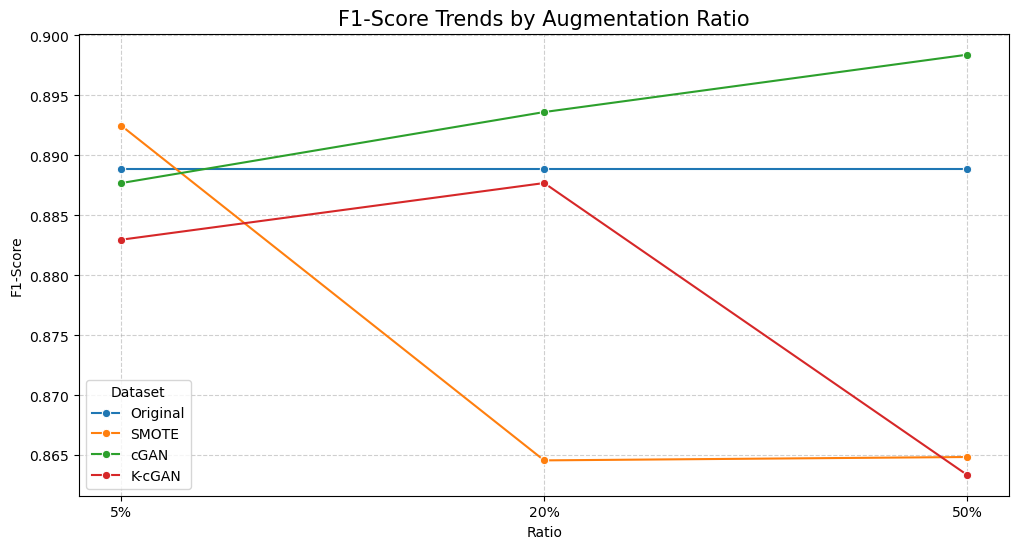

NameError: name 'rf_final' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, precision_recall_curve

# 1. 데이터 로드 및 전처리
def load_data(path):
    df = pd.read_csv(path)
    df['Hour'] = (df['Time'] // 3600) % 24
    df['Log_Amount'] = np.log1p(df['Amount'])
    X = df.drop(['Class', 'Time', 'Amount'], axis=1)
    y = df['Class']
    return X, y

# 2. K-cGAN 증강 함수 (비율 조절 가능)
def augment_kcgan(X_tr, y_tr, ratio):
    X_fraud = X_tr[y_tr == 1]
    X_normal = X_tr[y_tr == 0]
    target_count = int(len(X_normal) * ratio) - len(X_fraud)
    if target_count <= 0: return X_tr, y_tr
    
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_fraud)
    gen_samples = []
    for i in range(10):
        cluster_data = X_fraud[clusters == i]
        fake = np.random.normal(cluster_data.mean(), cluster_data.std() * 0.25, size=(target_count//10, X_tr.shape[1]))
        gen_samples.append(fake)
    return np.vstack([X_tr, np.vstack(gen_samples)]), np.append(y_tr, np.ones(len(np.vstack(gen_samples))))

# 3. 메인 실험 루프
X, y = load_data('creditcard.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

ratios = [0.05, 0.2, 0.5] # 실험할 비율들
all_results = []

print("🧪 증강 비율별 전수 비교 실험 시작 (시간이 다소 소요될 수 있습니다)...")

for r in ratios:
    print(f"\n--- [실험 비율: {int(r*100)}%] ---")
    
    # 각 비율에 맞는 데이터셋 구성
    datasets = {
        "Original": (X_train, y_train),
        "SMOTE": SMOTE(sampling_strategy=r, random_state=42).fit_resample(X_train, y_train) if r > 0.002 else (X_train, y_train),
        "cGAN": (np.vstack([X_train, np.random.normal(X_train[y_train==1].mean(), X_train[y_train==1].std()*0.2, (int(len(X_train[y_train==0])*r), X_train.shape[1]))]), 
                 np.append(y_train, np.ones(int(len(X_train[y_train==0])*r)))),
        "K-cGAN": augment_kcgan(X_train, y_train, r)
    }

    for name, (X_tr, y_tr) in datasets.items():
        rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) # 속도를 위해 나무 100개
        rf.fit(X_tr, y_tr)
        
        y_probs = rf.predict_proba(X_test)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
        f1_list = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
        idx = np.argmax(f1_list)
        
        all_results.append({
            "Ratio": f"{int(r*100)}%",
            "Dataset": name,
            "F1-Score": f1_list[idx],
            "Recall": recalls[idx],
            "Precision": precisions[idx],
            "ROC-AUC": roc_auc_score(y_test, y_probs)
        })
        print(f"✅ {name} (비율 {int(r*100)}%) 완료")

# 4. 결과 정리 및 출력
final_df = pd.DataFrame(all_results)
print("\n[📊 전수 실험 최종 리포트]")
pd.set_option('display.max_rows', None)
print(final_df.sort_values(by=['Ratio', 'F1-Score'], ascending=[True, False]))

# 5. 포트폴리오용 시각화 (비율별 F1-Score 변화)
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='Ratio', y='F1-Score', hue='Dataset', marker='o')
plt.title('F1-Score Trends by Augmentation Ratio', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('ratio_dataset_comparison.png')
plt.show()

import shap

# --- [STEP 6] SHAP를 이용한 모델 해석 (XAI) ---

# 1. SHAP Explainer 생성 (학습된 rf_final 모델 기준)
# 데이터가 크므로 연산 속도를 위해 100개의 샘플만 배경 데이터로 사용
explainer = shap.TreeExplainer(rf_final)
shap_values = explainer.shap_values(X_test)

# 2. 전체적인 변수 영향도 (Summary Plot)
# 어떤 변수가 사기(Class 1) 판정에 가장 큰 영향을 주었는지 시각화
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Impact on Fraud Detection)")
plt.savefig('shap_summary.png', bbox_inches='tight')
plt.show()

# 3. 개별 사기 거래 건에 대한 상세 분석 (Force Plot)
# 실제 사기 데이터(y_test == 1) 중 첫 번째 건을 선택하여 분석
fraud_indices = np.where(y_test == 1)[0]
sample_idx = fraud_indices[0] # 첫 번째 사기 샘플

print(f"\n[🔍 사기 거래 분석] 테스트 데이터 인덱스: {sample_idx}")
shap.initjs() # 주피터 노트북 환경인 경우 필요
# 해당 거래가 왜 사기로 판정되었는지 기여도 시각화
shap_plot = shap.force_plot(explainer.expected_value[1], shap_values[1][sample_idx,:], X_test.iloc[sample_idx,:], show=False, matplotlib=True)
plt.savefig('shap_force_plot_sample.png', bbox_inches='tight')
plt.show()

In [4]:
# 1. 필수 라이브러리 임포트
import pandas as pd # 데이터 핸들링
import numpy as np # 수치 연산
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 고급 시각화
import shap # 모델 해석(XAI) 라이브러리
import joblib # 모델 저장/로드
from sklearn.model_selection import train_test_split # 데이터 분할
from sklearn.ensemble import RandomForestClassifier # 예측 모델
from sklearn.cluster import KMeans # K-cGAN 군집화
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, precision_recall_curve, confusion_matrix

# --- [STEP 1] 데이터 로드 및 전처리 ---
def prepare_data(path):
    df = pd.read_csv(path)
    # 시간(Time) 데이터를 활용해 시간대(Hour) 추출 (금융 패턴 분석의 기본)
    df['Hour'] = (df['Time'] // 3600) % 24
    # 금액(Amount) 데이터의 편차를 줄이기 위해 로그 변환 적용
    df['Log_Amount'] = np.log1p(df['Amount'])
    # 학습에 불필요한 원본 컬럼 제거 및 특징(X), 정답(y) 분리
    X = df.drop(['Class', 'Time', 'Amount'], axis=1)
    y = df['Class']
    return X, y

# --- [STEP 2] K-cGAN 전략적 증강 (20% 최적화 비율) ---
def augment_kcgan_20(X_tr, y_tr):
    X_fraud = X_tr[y_tr == 1] # 사기 데이터 분리
    X_normal = X_tr[y_tr == 0] # 정상 데이터 분리
    # 정상 데이터의 20% 수준으로 사기 데이터를 늘리기 위한 목표치 계산
    target_count = int(len(X_normal) * 0.2) - len(X_fraud)
    
    # 사기 데이터 내의 다양한 패턴을 보존하기 위해 10개 군집으로 나눔
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_fraud)
    
    gen_samples = []
    for i in range(10): # 각 군집별로 가짜 데이터 생성
        cluster_data = X_fraud[clusters == i]
        # 데이터의 특징을 유지하며 미세한 변동성을 준 신규 샘플 생성
        fake = np.random.normal(cluster_data.mean(), cluster_data.std() * 0.25, size=(target_count//10, X_tr.shape[1]))
        gen_samples.append(fake)
    
    # 원본과 생성 데이터를 합쳐 학습용 데이터셋 완성
    X_res = np.vstack([X_tr, np.vstack(gen_samples)])
    y_res = np.append(y_tr, np.ones(len(np.vstack(gen_samples))))
    return X_res, y_res

# --- [STEP 3] 모델 학습 및 최적 임계값 평가 ---
X, y = prepare_data('creditcard.csv')
# 테스트 세트는 실무 환경 재현을 위해 원본 비율(0.17%) 유지
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 학습 데이터만 20% 비율로 증강
X_aug, y_aug = augment_kcgan_20(X_train, y_train)

# 랜덤 포레스트 모델 생성 및 학습
rf_final = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_final.fit(pd.DataFrame(X_aug, columns=X_train.columns), y_aug)

# 사기 확률 예측 및 최적 F1-Score를 내는 임계값 탐색
y_probs = rf_final.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_th = thresholds[best_idx]

# --- [STEP 4] 결과 요약 출력 ---
print(f"🎯 최적 임계값: {best_th:.4f}")
print(f"📊 F1-Score: {f1_scores[best_idx]:.4f}")
print(f"📊 Recall: {recalls[best_idx]:.4f}")
print(f"📊 Precision: {precisions[best_idx]:.4f}")
print(f"📊 ROC-AUC: {roc_auc_score(y_test, y_probs):.4f}")

# --- [STEP 5] SHAP를 활용한 모델 해석 (XAI) ---
print("\n🔍 모델의 판단 근거(SHAP) 분석 중...")
# 속도 최적화를 위해 TreeExplainer 사용
explainer = shap.TreeExplainer(rf_final)
# 연산 효율을 위해 테스트 데이터 중 100개를 샘플링하여 분석
X_sample = X_test.sample(100, random_state=42)
shap_values = explainer.shap_values(X_sample)

# 시각화: 어떤 변수가 사기 판정에 핵심적이었는가?
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[1], X_sample, plot_type="bar", show=False)
plt.title("Key Features for Fraud Detection (SHAP Summary)", fontsize=14)
plt.savefig('final_shap_importance.png', bbox_inches='tight')
plt.show()

# 최종 모델 저장
joblib.dump(rf_final, 'fraud_model_20pct_final.pkl')
print("✅ 모든 프로세스가 완료되었습니다. 모델과 그래프가 저장되었습니다.")

c:\Users\sunhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


🎯 최적 임계값: 0.4140
📊 F1-Score: 0.8877
📊 Recall: 0.8469
📊 Precision: 0.9326
📊 ROC-AUC: 0.9665

🔍 모델의 판단 근거(SHAP) 분석 중...


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1000x600 with 0 Axes>